In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('fd01-sample1.csv')

x_train, x_test = train_test_split(df, test_size=0.2)
print(x_train.shape, x_test.shape)

(800, 30) (200, 30)


[ 4.99310462e-01 -3.99600388e-16 -2.08498618e-17  6.02208878e-16
  4.45128322e-17  2.27411231e-17  1.21099464e-16  4.16998262e-17
  1.71337149e-16 -5.49556840e-17  1.52335943e-16  1.46463309e-16
  5.49069255e-17 -6.69895810e-17 -3.94126495e-18 -1.64265133e-16
 -1.74601903e-16  5.19062437e-16 -2.13822812e-16 -1.83331266e-16
  8.72309079e-18  9.19634547e-17 -1.12660574e-18  2.14811727e-16
 -1.16532824e-16 -1.41904162e-16  7.86237084e-17 -1.36827891e-16
 -1.07111059e-16  3.94854293e-17]
[[ 87   0]
 [  0 113]]


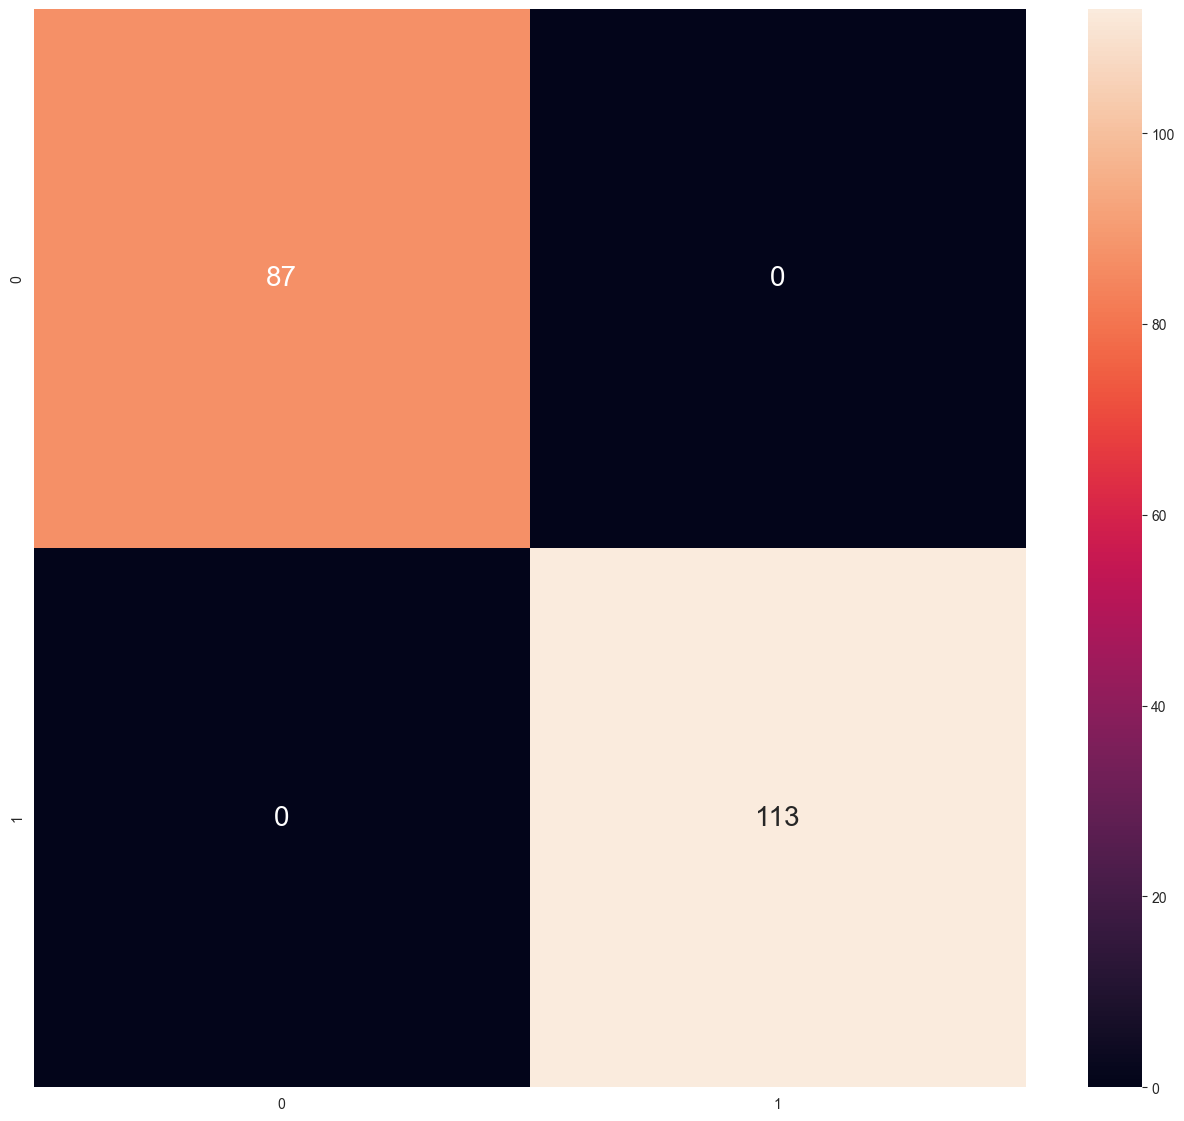

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing

# The following 2 scalers(MinMaxScaler and StandardScaler) both work with the same accuracy
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x_train)
# xt = scaler.transform(x_test)
scaler = StandardScaler()
x = scaler.fit_transform(x_train)
xt = scaler.transform(x_test)
# x = preprocessing.normalize(x_train)
# xt = preprocessing.normalize(x_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, x_train.Class)
print(model.coef_)
y = model.predict(xt)

# import seaborn as sns
# sns.catplot(x=x[:, 0], y=model.labels_)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cm = confusion_matrix(x_test.iloc[:, 0], np.where(y > 0.5, 1, 0))
print(cm)
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 20})

plt.show()

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.labels_)
# disp.plot()
# plt.show()
